In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

# EDA

In [20]:
data=pd.read_csv("nike_sales_2024.csv")
data.head(5)

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


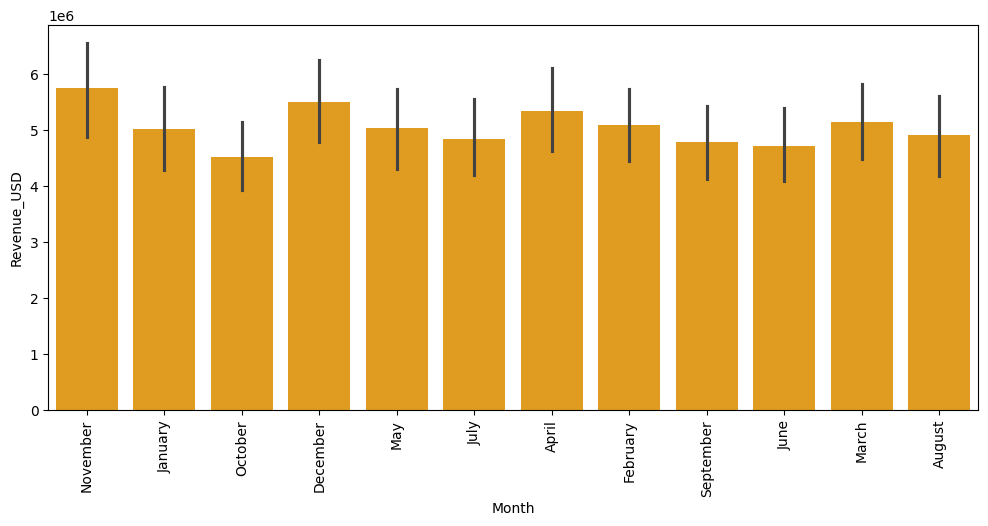

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x="Month",y="Revenue_USD",data=data,color="orange")
plt.xticks(rotation=90)
plt.show()

In [23]:
le=LabelEncoder()
data["Month"]=le.fit_transform(data["Month"])
data["Region"]=le.fit_transform(data["Region"])
data["Main_Category"]=le.fit_transform(data["Main_Category"])
data["Sub_Category"]=le.fit_transform(data["Sub_Category"])
data["Product_Line"]=le.fit_transform(data["Product_Line"])
data["Price_Tier"]=le.fit_transform(data["Price_Tier"])

<Axes: >

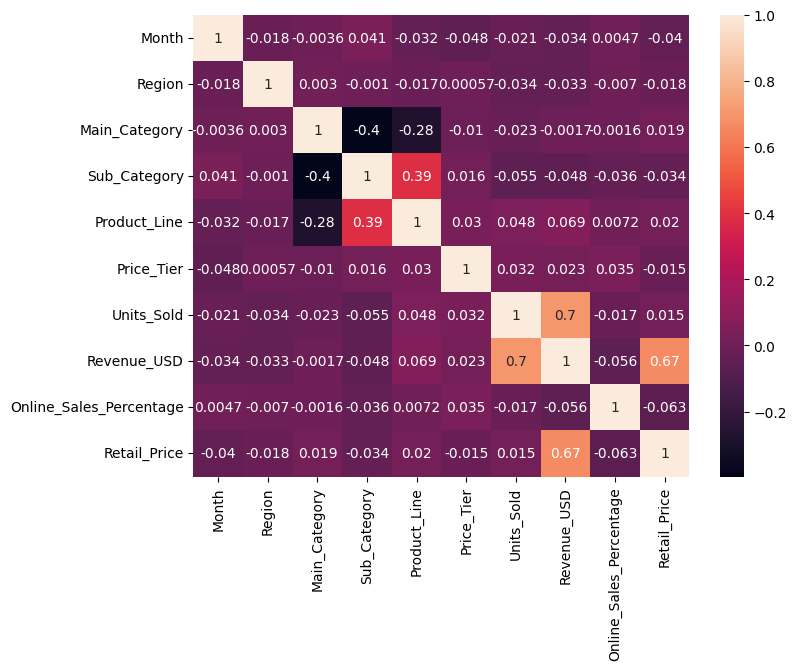

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

# Feature Engineering

In [25]:
ss=StandardScaler()
x=data.drop("Retail_Price",axis=1)
y=data["Retail_Price"]
x=ss.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Models

In [43]:
models={
    "Linear Regression":LinearRegression(),
    "Random Forest Regression":RandomForestRegressor(),
    "Decision Tree Regression":DecisionTreeRegressor(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "XGBoost Regression":XGBRegressor(),
    "KNN Regression":KNeighborsRegressor(),
}

In [44]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2=r2_score(y_test,y_pred)
    print(f"{name}")
    print(f"{r2*100}")
    print("-"*70)

Linear Regression
83.82847673922436
----------------------------------------------------------------------
Random Forest Regression
98.86398275826521
----------------------------------------------------------------------
Decision Tree Regression
96.11202583230629
----------------------------------------------------------------------
Ridge Regression
83.81712943760861
----------------------------------------------------------------------
Lasso Regression
83.85889879603316
----------------------------------------------------------------------
XGBoost Regression
98.69315028190613
----------------------------------------------------------------------
KNN Regression
47.1228780770854
----------------------------------------------------------------------


In [48]:
results={
    "Model":["Linear Regression","Random Forest REgression","Decision Tree Regression","Ridge REgression","Lasso Regression","XGBoost Regression","KNN"],
    "Accuracy":[83.82,98.97,95.96,83.81,83.85,98.69,47.12]
}

In [49]:
results_df=pd.DataFrame(results)

# Results

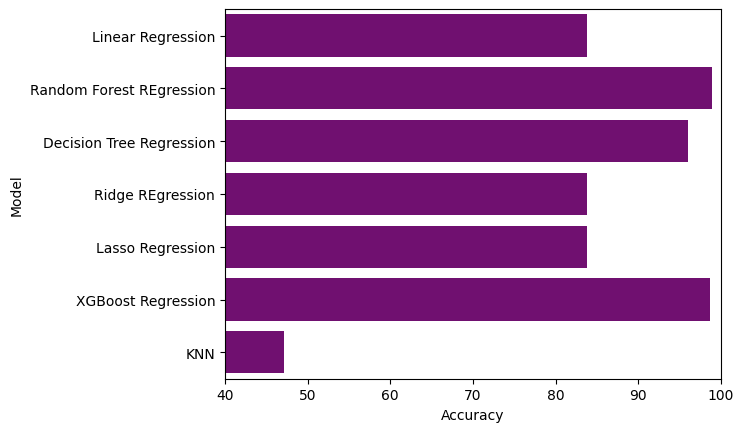

In [54]:
sns.barplot(y="Model",x="Accuracy",data=results_df,color="purple")
plt.xlim(40,100)
plt.show()